In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import math
from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler

In [59]:
FF_df = pd.read_csv('form_factors.csv')
TD_x_df = pd.read_csv('gpr_total_density_x_200.csv')
TD_y_df = pd.read_csv('gpr_total_density_y_200.csv')

FF_df = FF_df.transpose()
TD_x_df = TD_x_df.transpose()
TD_y_df = TD_y_df.transpose()

FF_df = (FF_df-FF_df.mean())/FF_df.std()
TD_x_df = (TD_x_df-TD_x_df.mean())/TD_x_df.std()
TD_y_df = (TD_y_df-TD_y_df.mean())/TD_y_df.std()

In [60]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [61]:
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,...,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098
1,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,...,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821
2,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,...,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543
3,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,...,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266
4,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,...,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,...,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989
196,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,...,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266
197,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,...,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543
198,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,...,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821


In [62]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-0.292967,-0.043943,-0.158113,-0.101767,-0.074313,-0.015691,0.130820,-0.081422,-0.077652,-0.176547,...,-0.055277,-0.100642,-0.038685,-0.145616,-0.091428,-0.245502,-0.061689,-0.065606,-0.220929,-0.171157
1,-0.287719,-0.048955,-0.158903,-0.108930,-0.065830,-0.027563,0.116175,-0.081356,-0.076761,-0.174650,...,-0.045650,-0.097157,-0.037322,-0.147582,-0.080542,-0.245715,-0.050817,-0.060005,-0.218079,-0.128594
2,-0.285331,-0.054403,-0.159960,-0.112849,-0.062805,-0.033899,0.110771,-0.082830,-0.074020,-0.173992,...,-0.044475,-0.097230,-0.037047,-0.148528,-0.080141,-0.246071,-0.053721,-0.057062,-0.216923,-0.104758
3,-0.284011,-0.057850,-0.160734,-0.114323,-0.062832,-0.036013,0.111254,-0.084084,-0.071692,-0.173963,...,-0.047638,-0.100022,-0.037256,-0.147606,-0.082219,-0.246198,-0.060734,-0.055632,-0.216739,-0.095096
4,-0.283050,-0.058699,-0.161087,-0.114178,-0.064223,-0.035278,0.114579,-0.084358,-0.070750,-0.174172,...,-0.051569,-0.104700,-0.037584,-0.145384,-0.083096,-0.246001,-0.066050,-0.055196,-0.216993,-0.095194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.284641,-0.058231,-0.159933,-0.114170,-0.065815,-0.040228,0.110020,-0.085534,-0.071605,-0.173548,...,-0.054341,-0.099677,-0.037964,-0.144443,-0.080849,-0.246660,-0.048337,-0.057925,-0.217384,-0.111441
196,-0.285351,-0.056702,-0.158876,-0.114536,-0.064869,-0.039316,0.107380,-0.088656,-0.073382,-0.173128,...,-0.051663,-0.095382,-0.038246,-0.143589,-0.076135,-0.246312,-0.048564,-0.064769,-0.216985,-0.107901
197,-0.286225,-0.055992,-0.158280,-0.115670,-0.063731,-0.035067,0.103959,-0.089890,-0.076052,-0.173129,...,-0.051372,-0.093211,-0.038337,-0.142992,-0.073838,-0.246020,-0.052194,-0.069580,-0.216915,-0.105345
198,-0.288039,-0.057726,-0.159393,-0.117792,-0.063152,-0.025993,0.099929,-0.087382,-0.079193,-0.173866,...,-0.056617,-0.094425,-0.037948,-0.144643,-0.080083,-0.246297,-0.061096,-0.068880,-0.217690,-0.105507


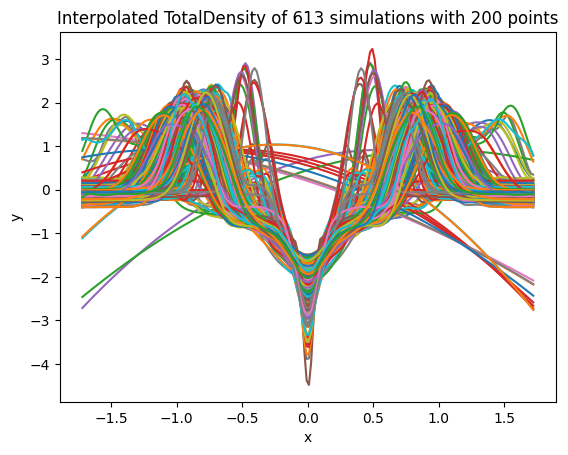

In [63]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 613 simulations with 200 points')
plt.show()

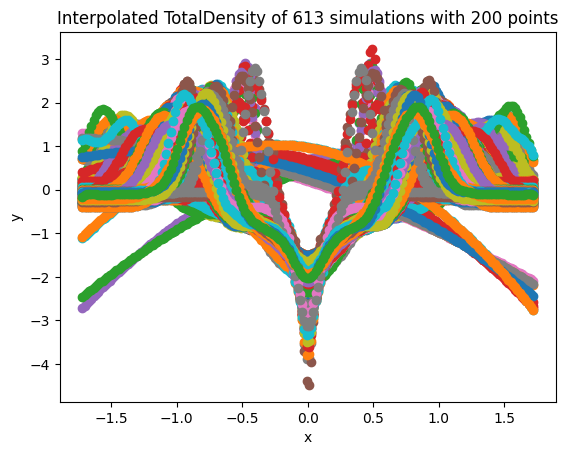

In [64]:
for index in TD_x_df.columns:
    plt.scatter(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 613 simulations with 200 points')
plt.show()

In [65]:
TD_x_df.iloc[95:105]

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
95,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,...,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748,-0.077748
96,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,...,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471,-0.060471
97,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,...,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193,-0.043193
98,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,...,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916,-0.025916
99,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,...,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639,-0.008639
100,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,...,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639,0.008639
101,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,...,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916,0.025916
102,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,...,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193,0.043193
103,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,...,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471,0.060471
104,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,...,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748,0.077748


In [66]:
TD_y_df.iloc[95:105]

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
95,-1.511123,-1.765517,-1.592306,-1.710033,-1.915510,-1.681706,-1.633863,-1.704455,-1.996439,-1.614172,...,-1.788450,-1.950164,-1.818773,-2.118374,-2.245123,-1.630180,-1.612014,-1.773477,-1.795816,-1.802121
96,-1.606648,-1.854495,-1.654293,-1.766105,-2.024228,-1.726297,-1.683334,-1.779236,-2.151517,-1.664247,...,-1.923340,-2.015831,-1.884895,-2.386699,-2.533054,-1.707160,-1.701158,-1.863225,-1.844660,-1.886869
97,-1.686977,-1.926850,-1.705141,-1.810990,-2.113308,-1.761990,-1.722635,-1.839443,-2.273026,-1.704860,...,-2.036915,-2.067318,-1.938584,-2.616070,-2.801865,-1.770682,-1.774878,-1.935613,-1.883542,-1.955483
98,-1.744768,-1.977127,-1.741460,-1.842835,-2.176114,-1.787072,-1.750255,-1.881219,-2.346213,-1.733896,...,-2.120243,-2.102546,-1.976539,-2.783215,-3.011464,-1.816843,-1.827721,-1.985181,-1.911217,-2.003217
99,-1.774528,-2.001567,-1.760708,-1.860288,-2.207809,-1.800245,-1.765146,-1.901809,-2.361618,-1.749751,...,-2.166537,-2.120085,-1.996315,-2.870037,-3.126738,-1.842548,-1.856501,-2.008342,-1.926778,-2.026718
100,-1.773441,-1.998521,-1.761500,-1.862577,-2.206001,-1.800760,-1.766752,-1.899881,-2.317071,-1.751489,...,-2.171961,-2.119249,-1.996602,-2.866686,-3.127070,-1.845862,-1.860508,-2.003768,-1.929694,-2.024409
101,-1.741776,-1.968546,-1.743778,-1.849548,-2.171053,-1.788500,-1.755032,-1.875670,-2.218161,-1.738938,...,-2.136050,-2.100130,-1.977382,-2.773301,-3.012164,-1.826266,-1.841048,-1.972415,-1.919849,-1.996663
102,-1.682786,-1.914221,-1.708803,-1.821685,-2.106008,-1.764002,-1.730452,-1.830951,-2.077062,-1.712714,...,-2.061725,-2.063586,-1.939922,-2.600055,-2.802227,-1.784782,-1.800601,-1.917230,-1.897542,-1.945730
103,-1.602165,-1.839744,-1.658984,-1.780079,-2.016138,-1.728407,-1.693974,-1.768832,-1.910028,-1.674162,...,-1.954943,-2.011171,-1.886620,-2.365447,-2.532429,-1.723913,-1.741968,-1.842636,-1.863475,-1.875445
104,-1.507160,-1.750414,-1.597569,-1.726373,-1.908201,-1.683362,-1.647012,-1.693394,-1.734238,-1.625240,...,-1.824040,-1.945029,-1.820726,-2.093210,-2.243397,-1.647416,-1.667798,-1.753925,-1.818718,-1.790747


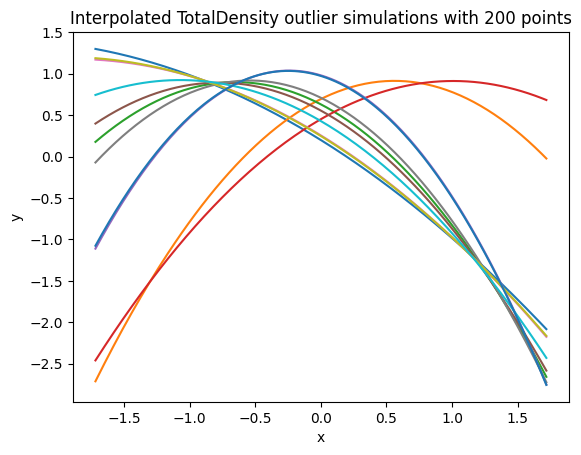

In [67]:
column_indexes = []
index = 0
for value in TD_y_df.iloc[99]:
    if value > -1:
        column_indexes.append(index)
    index = index + 1
    
for index in column_indexes:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity outlier simulations with 200 points')
plt.show()

In [68]:
FF_df = FF_df.drop(column_indexes, axis=1)
TD_x_df = TD_x_df.drop(column_indexes, axis=1)
TD_y_df = TD_y_df.drop(column_indexes, axis=1)

In [69]:
FF_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894,0.672328,-0.105556
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323,0.671703,-0.105924
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612,0.669829,-0.107030
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758,0.666705,-0.108872
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762,0.662335,-0.111451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120,-0.640692,-0.750145
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901,-0.640672,-0.749707
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640,-0.640653,-0.749303
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337,-0.640635,-0.748932


In [70]:
TD_x_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,...,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098,-1.719098
1,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,...,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821,-1.701821
2,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,...,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543,-1.684543
3,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,...,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266,-1.667266
4,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,...,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989,-1.649989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,...,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989,1.649989
196,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,...,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266,1.667266
197,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,...,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543,1.684543
198,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,...,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821,1.701821


In [71]:
TD_y_df

,0,1,2,3,4,5,6,7,8,9,...,603,604,605,606,607,608,609,610,611,612
0,-0.292967,-0.043943,-0.158113,-0.101767,-0.074313,-0.015691,0.130820,-0.081422,-0.077652,-0.176547,...,-0.055277,-0.100642,-0.038685,-0.145616,-0.091428,-0.245502,-0.061689,-0.065606,-0.220929,-0.171157
1,-0.287719,-0.048955,-0.158903,-0.108930,-0.065830,-0.027563,0.116175,-0.081356,-0.076761,-0.174650,...,-0.045650,-0.097157,-0.037322,-0.147582,-0.080542,-0.245715,-0.050817,-0.060005,-0.218079,-0.128594
2,-0.285331,-0.054403,-0.159960,-0.112849,-0.062805,-0.033899,0.110771,-0.082830,-0.074020,-0.173992,...,-0.044475,-0.097230,-0.037047,-0.148528,-0.080141,-0.246071,-0.053721,-0.057062,-0.216923,-0.104758
3,-0.284011,-0.057850,-0.160734,-0.114323,-0.062832,-0.036013,0.111254,-0.084084,-0.071692,-0.173963,...,-0.047638,-0.100022,-0.037256,-0.147606,-0.082219,-0.246198,-0.060734,-0.055632,-0.216739,-0.095096
4,-0.283050,-0.058699,-0.161087,-0.114178,-0.064223,-0.035278,0.114579,-0.084358,-0.070750,-0.174172,...,-0.051569,-0.104700,-0.037584,-0.145384,-0.083096,-0.246001,-0.066050,-0.055196,-0.216993,-0.095194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.284641,-0.058231,-0.159933,-0.114170,-0.065815,-0.040228,0.110020,-0.085534,-0.071605,-0.173548,...,-0.054341,-0.099677,-0.037964,-0.144443,-0.080849,-0.246660,-0.048337,-0.057925,-0.217384,-0.111441
196,-0.285351,-0.056702,-0.158876,-0.114536,-0.064869,-0.039316,0.107380,-0.088656,-0.073382,-0.173128,...,-0.051663,-0.095382,-0.038246,-0.143589,-0.076135,-0.246312,-0.048564,-0.064769,-0.216985,-0.107901
197,-0.286225,-0.055992,-0.158280,-0.115670,-0.063731,-0.035067,0.103959,-0.089890,-0.076052,-0.173129,...,-0.051372,-0.093211,-0.038337,-0.142992,-0.073838,-0.246020,-0.052194,-0.069580,-0.216915,-0.105345
198,-0.288039,-0.057726,-0.159393,-0.117792,-0.063152,-0.025993,0.099929,-0.087382,-0.079193,-0.173866,...,-0.056617,-0.094425,-0.037948,-0.144643,-0.080083,-0.246297,-0.061096,-0.068880,-0.217690,-0.105507


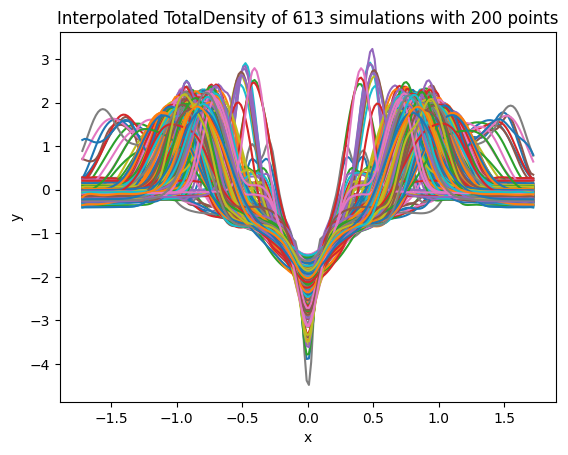

In [73]:
for index in TD_x_df.columns:
    plt.plot(TD_x_df[index],TD_y_df[index])
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated TotalDensity of 613 simulations with 200 points')
plt.show()

In [75]:
names = []
for i in TD_x_df.columns:
    names.append(str(i) + 'x')
    names.append(str(i) + 'y')

TD_df = pd.DataFrame(index=range(200),columns=[names])

for i in TD_x_df.columns:
    x_value = []
    y_value = []
    for value in TD_x_df[i]:
        x_value.append(value)
    for value in TD_y_df[i]:
        y_value.append(value)
    
    TD_df[str(i) + 'x'] = x_value
    TD_df[str(i) + 'y'] = y_value
    
TD_df

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,608x,608y,609x,609y,610x,610y,611x,611y,612x,612y
0,-1.719098,-0.292967,-1.719098,-0.043943,-1.719098,-0.158113,-1.719098,-0.101767,-1.719098,-0.074313,...,-1.719098,-0.245502,-1.719098,-0.061689,-1.719098,-0.065606,-1.719098,-0.220929,-1.719098,-0.171157
1,-1.701821,-0.287719,-1.701821,-0.048955,-1.701821,-0.158903,-1.701821,-0.108930,-1.701821,-0.065830,...,-1.701821,-0.245715,-1.701821,-0.050817,-1.701821,-0.060005,-1.701821,-0.218079,-1.701821,-0.128594
2,-1.684543,-0.285331,-1.684543,-0.054403,-1.684543,-0.159960,-1.684543,-0.112849,-1.684543,-0.062805,...,-1.684543,-0.246071,-1.684543,-0.053721,-1.684543,-0.057062,-1.684543,-0.216923,-1.684543,-0.104758
3,-1.667266,-0.284011,-1.667266,-0.057850,-1.667266,-0.160734,-1.667266,-0.114323,-1.667266,-0.062832,...,-1.667266,-0.246198,-1.667266,-0.060734,-1.667266,-0.055632,-1.667266,-0.216739,-1.667266,-0.095096
4,-1.649989,-0.283050,-1.649989,-0.058699,-1.649989,-0.161087,-1.649989,-0.114178,-1.649989,-0.064223,...,-1.649989,-0.246001,-1.649989,-0.066050,-1.649989,-0.055196,-1.649989,-0.216993,-1.649989,-0.095194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,-0.284641,1.649989,-0.058231,1.649989,-0.159933,1.649989,-0.114170,1.649989,-0.065815,...,1.649989,-0.246660,1.649989,-0.048337,1.649989,-0.057925,1.649989,-0.217384,1.649989,-0.111441
196,1.667266,-0.285351,1.667266,-0.056702,1.667266,-0.158876,1.667266,-0.114536,1.667266,-0.064869,...,1.667266,-0.246312,1.667266,-0.048564,1.667266,-0.064769,1.667266,-0.216985,1.667266,-0.107901
197,1.684543,-0.286225,1.684543,-0.055992,1.684543,-0.158280,1.684543,-0.115670,1.684543,-0.063731,...,1.684543,-0.246020,1.684543,-0.052194,1.684543,-0.069580,1.684543,-0.216915,1.684543,-0.105345
198,1.701821,-0.288039,1.701821,-0.057726,1.701821,-0.159393,1.701821,-0.117792,1.701821,-0.063152,...,1.701821,-0.246297,1.701821,-0.061096,1.701821,-0.068880,1.701821,-0.217690,1.701821,-0.105507


In [76]:
input_data = FF_df.iloc[: , :-2]
output_data = TD_df.iloc[: , :-4]

In [77]:
input_data

,0,1,2,3,4,5,6,7,8,9,...,601,602,603,604,605,606,607,608,609,610
0,0.980720,-0.444256,0.186761,-0.047851,-0.354703,-0.584007,-0.183981,-0.309006,-0.349255,0.267737,...,-0.670520,-0.250014,-0.513892,-0.299718,-0.477219,0.087297,-0.142115,0.840006,-0.459976,-0.427894
1,0.980030,-0.444704,0.186284,-0.048252,-0.355220,-0.584411,-0.183635,-0.309460,-0.349860,0.267305,...,-0.670950,-0.250566,-0.514353,-0.299953,-0.477644,0.086667,-0.142717,0.839384,-0.460461,-0.428323
2,0.977961,-0.446046,0.184852,-0.049453,-0.356769,-0.585624,-0.182598,-0.310820,-0.351675,0.266009,...,-0.672240,-0.252221,-0.515734,-0.300657,-0.478919,0.084776,-0.144520,0.837520,-0.461915,-0.429612
3,0.974512,-0.448282,0.182466,-0.051454,-0.359351,-0.587644,-0.180870,-0.313086,-0.354698,0.263851,...,-0.674390,-0.254978,-0.518037,-0.301829,-0.481043,0.081625,-0.147525,0.834413,-0.464338,-0.431758
4,0.969687,-0.451412,0.179127,-0.054255,-0.362964,-0.590472,-0.178453,-0.316257,-0.358928,0.260830,...,-0.677398,-0.258837,-0.521258,-0.303470,-0.484016,0.077216,-0.151730,0.830066,-0.467729,-0.434762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.637919,-0.763000,-0.775248,-0.745377,-0.664294,-0.757084,-0.752626,-0.656961,-0.656225,-0.777161,...,-0.743381,-0.669381,-0.857844,-0.764482,-0.705293,-0.861659,-0.689449,-0.738946,-0.677948,-0.761120
996,-0.637355,-0.762537,-0.774302,-0.744959,-0.665308,-0.758153,-0.751415,-0.656542,-0.659345,-0.777468,...,-0.743575,-0.669735,-0.857907,-0.765611,-0.704952,-0.862931,-0.690513,-0.738721,-0.677956,-0.760901
997,-0.636854,-0.762078,-0.773360,-0.744537,-0.666345,-0.759220,-0.750233,-0.656158,-0.662494,-0.777772,...,-0.743771,-0.670089,-0.857928,-0.766756,-0.704615,-0.864157,-0.691557,-0.738505,-0.678050,-0.760640
998,-0.636415,-0.761626,-0.772425,-0.744112,-0.667403,-0.760285,-0.749080,-0.655810,-0.665672,-0.778070,...,-0.743970,-0.670442,-0.857907,-0.767919,-0.704282,-0.865337,-0.692583,-0.738300,-0.678230,-0.760337


In [78]:
output_data

,0x,0y,1x,1y,2x,2y,3x,3y,4x,4y,...,606x,606y,607x,607y,608x,608y,609x,609y,610x,610y
0,-1.719098,-0.292967,-1.719098,-0.043943,-1.719098,-0.158113,-1.719098,-0.101767,-1.719098,-0.074313,...,-1.719098,-0.145616,-1.719098,-0.091428,-1.719098,-0.245502,-1.719098,-0.061689,-1.719098,-0.065606
1,-1.701821,-0.287719,-1.701821,-0.048955,-1.701821,-0.158903,-1.701821,-0.108930,-1.701821,-0.065830,...,-1.701821,-0.147582,-1.701821,-0.080542,-1.701821,-0.245715,-1.701821,-0.050817,-1.701821,-0.060005
2,-1.684543,-0.285331,-1.684543,-0.054403,-1.684543,-0.159960,-1.684543,-0.112849,-1.684543,-0.062805,...,-1.684543,-0.148528,-1.684543,-0.080141,-1.684543,-0.246071,-1.684543,-0.053721,-1.684543,-0.057062
3,-1.667266,-0.284011,-1.667266,-0.057850,-1.667266,-0.160734,-1.667266,-0.114323,-1.667266,-0.062832,...,-1.667266,-0.147606,-1.667266,-0.082219,-1.667266,-0.246198,-1.667266,-0.060734,-1.667266,-0.055632
4,-1.649989,-0.283050,-1.649989,-0.058699,-1.649989,-0.161087,-1.649989,-0.114178,-1.649989,-0.064223,...,-1.649989,-0.145384,-1.649989,-0.083096,-1.649989,-0.246001,-1.649989,-0.066050,-1.649989,-0.055196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.649989,-0.284641,1.649989,-0.058231,1.649989,-0.159933,1.649989,-0.114170,1.649989,-0.065815,...,1.649989,-0.144443,1.649989,-0.080849,1.649989,-0.246660,1.649989,-0.048337,1.649989,-0.057925
196,1.667266,-0.285351,1.667266,-0.056702,1.667266,-0.158876,1.667266,-0.114536,1.667266,-0.064869,...,1.667266,-0.143589,1.667266,-0.076135,1.667266,-0.246312,1.667266,-0.048564,1.667266,-0.064769
197,1.684543,-0.286225,1.684543,-0.055992,1.684543,-0.158280,1.684543,-0.115670,1.684543,-0.063731,...,1.684543,-0.142992,1.684543,-0.073838,1.684543,-0.246020,1.684543,-0.052194,1.684543,-0.069580
198,1.701821,-0.288039,1.701821,-0.057726,1.701821,-0.159393,1.701821,-0.117792,1.701821,-0.063152,...,1.701821,-0.144643,1.701821,-0.080083,1.701821,-0.246297,1.701821,-0.061096,1.701821,-0.068880


In [79]:
column_index = []
for i in input_data.columns:
    column_index.append(i)

random.seed(42)
train = random.sample(column_index,488)
test = []
for number in column_index:
    if not number in train:
        test.append(number)

print(train)
print(test)

[119, 27, 286, 255, 233, 147, 109, 569, 94, 442, 34, 32, 100, 228, 243, 527, 29, 585, 208, 603, 439, 230, 469, 289, 6, 168, 601, 356, 587, 164, 225, 351, 604, 99, 398, 104, 375, 360, 275, 47, 480, 560, 132, 396, 84, 306, 378, 201, 74, 49, 238, 301, 85, 596, 108, 576, 582, 474, 381, 171, 388, 371, 219, 278, 76, 180, 607, 172, 483, 397, 281, 229, 339, 60, 239, 600, 330, 419, 279, 70, 221, 329, 222, 521, 414, 479, 151, 276, 605, 131, 390, 292, 280, 139, 391, 305, 224, 588, 304, 209, 190, 117, 73, 265, 257, 561, 395, 26, 450, 59, 81, 328, 558, 525, 583, 529, 312, 534, 202, 200, 493, 244, 572, 133, 288, 501, 5, 495, 377, 61, 357, 463, 531, 393, 141, 402, 335, 179, 536, 155, 227, 566, 237, 1, 481, 458, 376, 516, 261, 399, 96, 264, 57, 455, 327, 157, 440, 334, 464, 318, 106, 499, 196, 460, 86, 539, 407, 522, 0, 313, 170, 543, 9, 471, 509, 422, 162, 127, 31, 128, 295, 42, 46, 382, 253, 37, 555, 277, 401, 67, 68, 344, 248, 608, 88, 140, 487, 317, 494, 113, 444, 503, 552, 361, 107, 373, 581, 510

In [80]:
train_input_values = []
for number in train:
    train_input_values.append(input_data[number])
    
train_output_values = []
for number in train:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    train_output_values.append(np.concatenate((list_1,list_2)))

test_input_values = []
for number in test:
    test_input_values.append(input_data[number])
    
test_output_values = []
for number in test:
    list_1 = output_data[str(number) + 'x']
    list_2 = output_data[str(number) + 'y']
    test_output_values.append(np.concatenate((list_1,list_2)))
    
train_input_values = np.array(train_input_values).astype(np.float32)
train_output_values = np.array(train_output_values).astype(np.float32)
test_input_values = np.array(test_input_values).astype(np.float32)
test_output_values = np.array(test_output_values).astype(np.float32)

In [81]:
print(train_input_values.shape)
print(train_output_values.shape)
print(test_input_values.shape)
print(test_output_values.shape)

(488, 1000)
(488, 400, 1)
(112, 1000)
(112, 400, 1)


In [184]:
def Loss(actual,prediction):
    length = int(len(prediction[0])/2)
    
    index = 0
    distance_average_sum = 0
    smoothness_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
         
        distance_sum = 0
        smoothness_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            smoothness_sum = smoothness_sum + abs(t_y[i]-p_y[i])
            
        distance_average_sum = distance_average_sum + distance_sum/length
        smoothness_average_sum = smoothness_average_sum + smoothness_sum/length
        index = index + 1
        
    return (distance_average_sum + smoothness_average_sum)/len(prediction)

def Plots(actual,prediction):
    random.seed(42)
    #prediction = model.predict(test_input_values)
    train = random.sample(range(0,len(test_input_values)),10)
    for number in train:
        length = int(len(prediction[0])/2)
        x_1 = prediction[number][0:length]
        y_1 = prediction[number][length:]
        plt.plot(x_1,y_1,c='b')

        x_2 = test_output_values[number][0:length]
        y_2 = test_output_values[number][length:]
        plt.plot(x_2,y_2,c='r')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output curve of the ten random predictions |blue| against actual |red|')
    plt.show() 
    
    index = 0
    for points in prediction:
        p_x = points[0:length]
        p_y = points[length:]
        plt.scatter(p_x,p_y,c='b', label='Prediction', alpha=0.25)
        t_x = test_output_values[index][0:length].tolist()
        t_y = test_output_values[index][length:].tolist()
        plt.scatter(t_x,t_y,c='r', label = 'Actual', alpha=0.50)
        index = index + 1

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Output scatterplot of prediction |blue| and actual |red| data')
    plt.show()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_4 (Dense)             (None, 4000)              4004000   
                                                                 
 dense_5 (Dense)             (None, 400)               1600400   
                                                                 
Total params: 5,604,400
Trainable params: 5,604,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 121ms/step - loss: 0.7120 - val_loss: 0.2096
Epoch 2/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.1291 - val_loss: 0.1278
Epoch 3/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0889 - val_loss: 0.1040
Epoch 4/1000
7/

Epoch 75/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0505 - val_loss: 0.0899
Epoch 76/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0503 - val_loss: 0.0860
Epoch 77/1000
7/7 [==============================] - 1s 82ms/step - loss: 0.0513 - val_loss: 0.0863
Epoch 78/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0485 - val_loss: 0.0877
Epoch 79/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0480 - val_loss: 0.0879
Epoch 80/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0480 - val_loss: 0.0897
Epoch 81/1000
7/7 [==============================] - 1s 82ms/step - loss: 0.0498 - val_loss: 0.0917
Epoch 82/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0568 - val_loss: 0.0920
Epoch 83/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0518 - val_loss: 0.0872
Epoch 84/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0505 - val_loss: 0.0882


7/7 [==============================] - 1s 77ms/step - loss: 0.0405 - val_loss: 0.0821
Epoch 238/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0409 - val_loss: 0.0833
Epoch 239/1000
7/7 [==============================] - 1s 76ms/step - loss: 0.0430 - val_loss: 0.0790
Epoch 240/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0442 - val_loss: 0.0871
Epoch 241/1000
7/7 [==============================] - 1s 77ms/step - loss: 0.0446 - val_loss: 0.0862
Epoch 242/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0430 - val_loss: 0.0855
Epoch 243/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0418 - val_loss: 0.0832
Epoch 244/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0410 - val_loss: 0.0783
Epoch 245/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0422 - val_loss: 0.0791
Epoch 246/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0401 - val_loss: 0.0804
Epoch

7/7 [==============================] - 1s 79ms/step - loss: 0.0372 - val_loss: 0.0780
Epoch 400/1000
7/7 [==============================] - 1s 81ms/step - loss: 0.0425 - val_loss: 0.0731
Epoch 401/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0386 - val_loss: 0.0839
Epoch 402/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0521 - val_loss: 0.0733
Epoch 403/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0436 - val_loss: 0.0781
Epoch 404/1000
7/7 [==============================] - 1s 82ms/step - loss: 0.0405 - val_loss: 0.0774
Epoch 405/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0403 - val_loss: 0.0746
Epoch 406/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0386 - val_loss: 0.0749
Epoch 407/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0382 - val_loss: 0.0729
Epoch 408/1000
7/7 [==============================] - 1s 84ms/step - loss: 0.0367 - val_loss: 0.0752
Epoch

7/7 [==============================] - 1s 79ms/step - loss: 0.0361 - val_loss: 0.0711
Epoch 562/1000
7/7 [==============================] - 1s 82ms/step - loss: 0.0347 - val_loss: 0.0705
Epoch 563/1000
7/7 [==============================] - 1s 86ms/step - loss: 0.0336 - val_loss: 0.0691
Epoch 564/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0333 - val_loss: 0.0701
Epoch 565/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0329 - val_loss: 0.0704
Epoch 566/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0332 - val_loss: 0.0720
Epoch 567/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0324 - val_loss: 0.0690
Epoch 568/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0333 - val_loss: 0.0705
Epoch 569/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0342 - val_loss: 0.0727
Epoch 570/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0319 - val_loss: 0.0678
Epoch

7/7 [==============================] - 1s 79ms/step - loss: 0.0322 - val_loss: 0.0754
Epoch 724/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0308 - val_loss: 0.0743
Epoch 725/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0319 - val_loss: 0.0839
Epoch 726/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0325 - val_loss: 0.0704
Epoch 727/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0315 - val_loss: 0.0725
Epoch 728/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0309 - val_loss: 0.0761
Epoch 729/1000
7/7 [==============================] - 1s 82ms/step - loss: 0.0307 - val_loss: 0.0704
Epoch 730/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0299 - val_loss: 0.0746
Epoch 731/1000
7/7 [==============================] - 1s 77ms/step - loss: 0.0308 - val_loss: 0.0700
Epoch 732/1000
7/7 [==============================] - 1s 78ms/step - loss: 0.0313 - val_loss: 0.0710
Epoch

7/7 [==============================] - 1s 80ms/step - loss: 0.0304 - val_loss: 0.0688
Epoch 886/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0303 - val_loss: 0.0711
Epoch 887/1000
7/7 [==============================] - 1s 76ms/step - loss: 0.0305 - val_loss: 0.0743
Epoch 888/1000
7/7 [==============================] - 1s 81ms/step - loss: 0.0285 - val_loss: 0.0681
Epoch 889/1000
7/7 [==============================] - 1s 76ms/step - loss: 0.0280 - val_loss: 0.0758
Epoch 890/1000
7/7 [==============================] - 1s 79ms/step - loss: 0.0302 - val_loss: 0.0709
Epoch 891/1000
7/7 [==============================] - 1s 76ms/step - loss: 0.0293 - val_loss: 0.0726
Epoch 892/1000
7/7 [==============================] - 1s 80ms/step - loss: 0.0292 - val_loss: 0.0736
Epoch 893/1000
7/7 [==============================] - 1s 75ms/step - loss: 0.0282 - val_loss: 0.0699
Epoch 894/1000
7/7 [==============================] - 1s 77ms/step - loss: 0.0287 - val_loss: 0.0723
Epoch

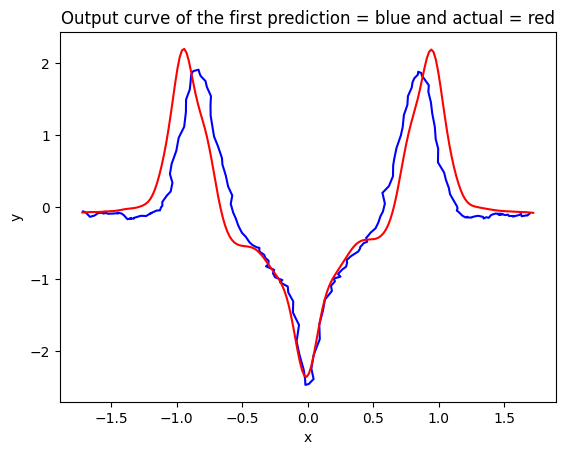

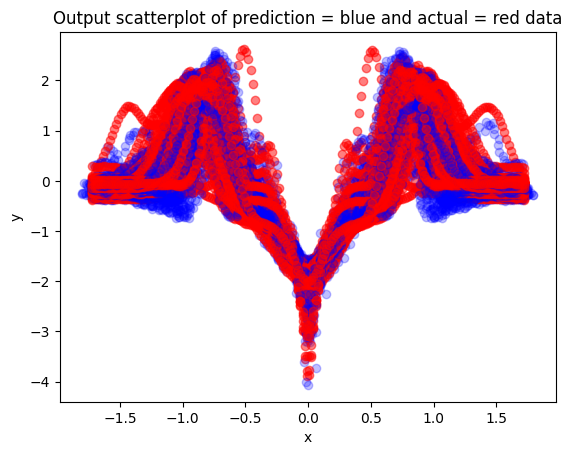

In [85]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(4000, activation="relu")(inputs)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


model.fit(train_input_values, train_output_values, batch_size=64, epochs=1000, validation_split=0.2)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_21 (Dense)            (None, 4000)              4004000   
                                                                 
 dense_22 (Dense)            (None, 3000)              12003000  
                                                                 
 dense_23 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_24 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_25 (Dense)            (None, 400)               400400    
                                                                 
Total params: 24,410,400
Trainable params: 24,410,400
Non-t

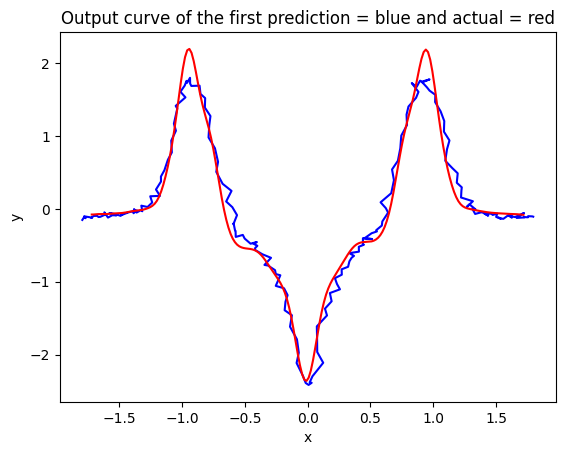

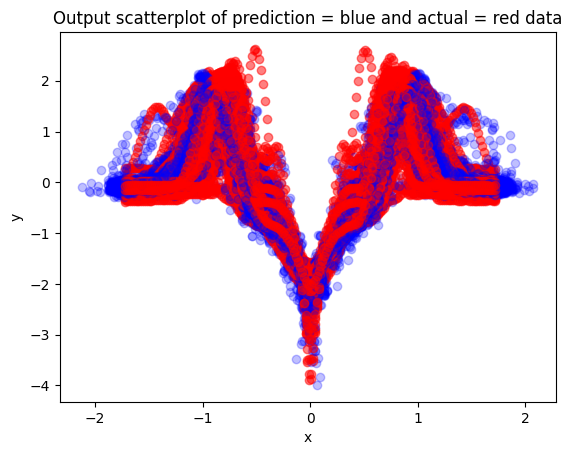

In [89]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

inputs = keras.Input(shape=(1000,))
x = layers.Dense(4000, activation="relu")(inputs)
x = layers.Dense(3000, activation="relu")(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

#callbacks = [TensorBoard(log_dir=log_folder,
#                         histogram_freq=1,
#                         write_graph=True,
#                         write_images=True,
#                         update_freq='epoch',
#                         profile_batch=2,
#                         embeddings_freq=1)]
callbacks = [EarlyStopping(monitor='val_loss', patience=15)]
#             ModelCheckpoint(filepath='FF_to_TD_pred', monitor='val_loss', save_best_only=True)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1250, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_26 (Dense)            (None, 4000)              4004000   
                                                                 
 dense_27 (Dense)            (None, 3000)              12003000  
                                                                 
 dense_28 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_29 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_30 (Dense)            (None, 400)               400400    
                                                                 
Total params: 24,410,400
Trainable params: 24,410,400
Non-t

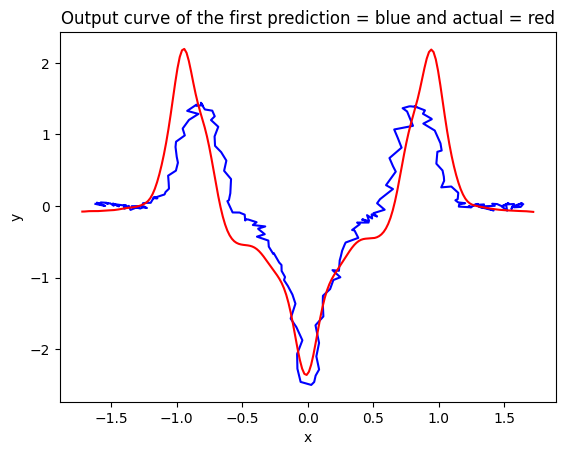

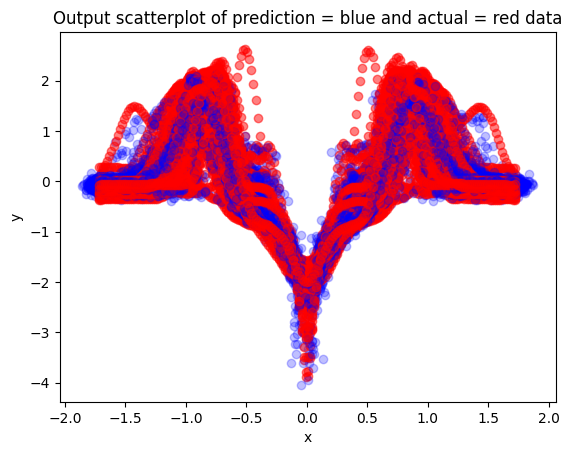

In [90]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(4000, activation="relu")(inputs)
x = layers.Dense(3000, activation="relu")(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

#callbacks = [TensorBoard(log_dir=log_folder,
#                         histogram_freq=1,
#                         write_graph=True,
#                         write_images=True,
#                         update_freq='epoch',
#                         profile_batch=2,
#                         embeddings_freq=1)]
callbacks = [EarlyStopping(monitor='val_loss', patience=25)]
#             ModelCheckpoint(filepath='FF_to_TD_pred', monitor='val_loss', save_best_only=True)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1250, validation_split=0.3,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 dense_31 (Dense)            (None, 4000)              4004000   
                                                                 
 dense_32 (Dense)            (None, 3000)              12003000  
                                                                 
 dense_33 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_34 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_35 (Dense)            (None, 400)               400400    
                                                                 
Total params: 24,410,400
Trainable params: 24,410,400
Non-t

Epoch 151/1250
7/7 [==============================] - 2s 309ms/step - loss: 0.0362 - val_loss: 0.0864
Epoch 152/1250
7/7 [==============================] - 2s 312ms/step - loss: 0.0388 - val_loss: 0.0885
Epoch 153/1250
7/7 [==============================] - 2s 312ms/step - loss: 0.0364 - val_loss: 0.0844
Epoch 154/1250
7/7 [==============================] - 2s 321ms/step - loss: 0.0354 - val_loss: 0.0861
Epoch 155/1250
7/7 [==============================] - 2s 309ms/step - loss: 0.0365 - val_loss: 0.0908
Epoch 156/1250
7/7 [==============================] - 2s 309ms/step - loss: 0.0353 - val_loss: 0.0894

4/4 [==============================] - 0s 16ms/step
MSE is:0.30030887112232635

4/4 [==============================] - 0s 16ms/step


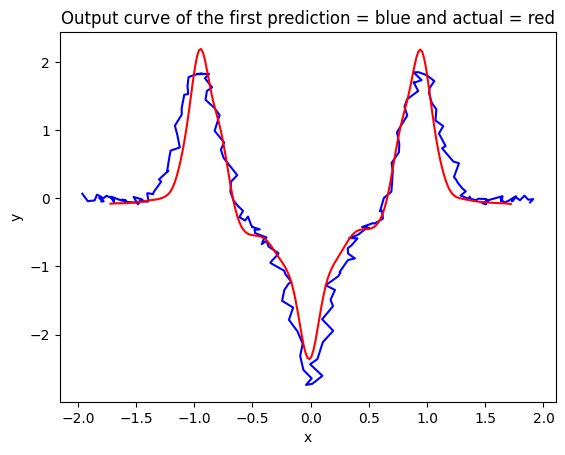

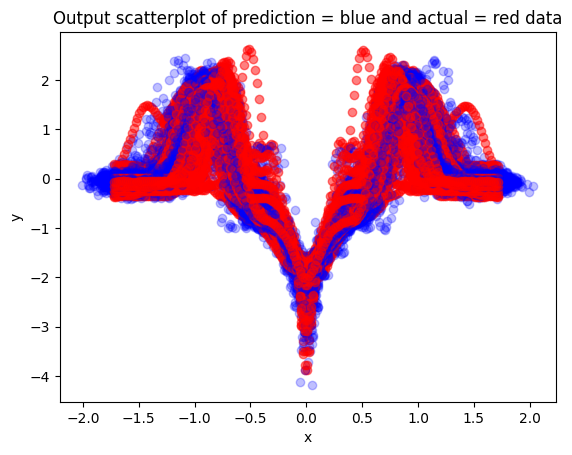

In [91]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

inputs = keras.Input(shape=(1000,))
x = layers.Dense(4000, activation="relu")(inputs)
x = layers.Dense(3000, activation="relu")(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

#callbacks = [TensorBoard(log_dir=log_folder,
#                         histogram_freq=1,
#                         write_graph=True,
#                         write_images=True,
#                         update_freq='epoch',
#                         profile_batch=2,
#                         embeddings_freq=1)]
callbacks = [EarlyStopping(monitor='val_loss', patience=20)]
#             ModelCheckpoint(filepath='FF_to_TD_pred', monitor='val_loss', save_best_only=True)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=1250, validation_split=0.2,callbacks=callbacks)
print('')
print('MSE is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_93 (Dense)            (None, 4000)              4004000   
                                                                 
 dense_94 (Dense)            (None, 3000)              12003000  
                                                                 
 dense_95 (Dense)            (None, 2000)              6002000   
                                                                 
 dense_96 (Dense)            (None, 1000)              2001000   
                                                                 
 dense_97 (Dense)            (None, 400)               400400    
                                                                 
Total params: 24,410,400
Trainable params: 24,410,400
Non-

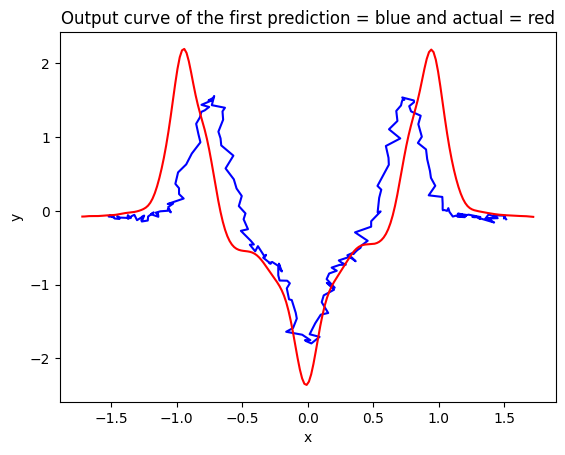

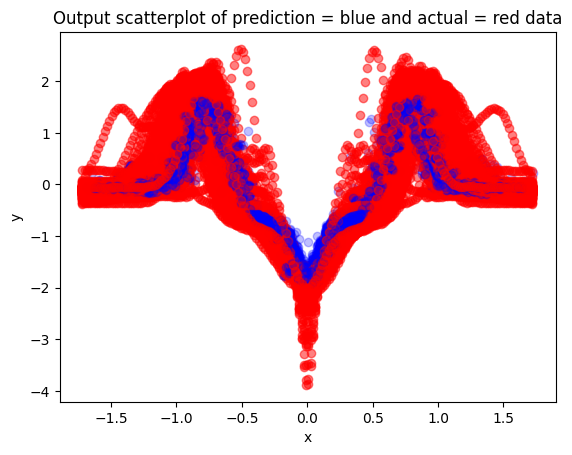

In [148]:
def custom_loss(true, pred):
    p_x = pred[:, 0:200]
    p_y = pred[:, 200:]
    t_x = true[:, 0:200]
    t_y = true[:, 200:]

    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    
    smoothness_penalty = tf.abs(t_y - p_y)
    smoothness_penalty_sum = tf.reduce_sum(smoothness_penalty, axis=-1)
    smoothnes_penalty_average = tf.reduce_mean(smoothness_penalty_sum)
    
    return distance_average + smoothness_penalty
    
inputs = keras.Input(shape=(1000,))
x = layers.Dense(4000, activation="relu")(inputs)
x = layers.Dense(3000, activation="relu")(x)
x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=20)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=10, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(MSE(test_output_values,model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

In [120]:
print('Loss is:' + str(Loss(test_output_values,model.predict(test_input_values))))

4/4 [==============================] - 0s 34ms/step
Loss is:[0.3747465]


In [191]:
def Loss(actual,prediction):
    length = int(len(actual[0])/2)
    
    index = 0
    distance_average_sum = 0
    smoothness_average_sum = 0
    for data in prediction:
        p_x = data[0:length]
        p_y = data[length:]
        t_x = actual[index][0:length]
        t_y = actual[index][length:]
        
        distance_sum = 0
        smoothness_sum = 0
        for i in range(0,length):
            distance_sum = distance_sum + math.sqrt((t_x[i]-p_x[i])**2 + (t_y[i]-p_y[i])**2)
            smoothness_sum = smoothness_sum + abs(t_y[i]-p_y[i])
        
        distance_average_sum = distance_average_sum + distance_sum/length
        smoothness_average_sum = smoothness_average_sum + smoothness_sum[0]/length
        
        index = index + 1
        
    #print(distance_average_sum)
        
    return (distance_average_sum + smoothness_average_sum)/len(actual)
    
#Loss(test_output_values, model.predict(test_input_values))

In [151]:
def custom_loss(true, pred):
    # Shape is [64,400]
    
    
    #print(tf.shape(true))
    p_x = pred[:, 0:200]
    p_y = pred[:, 200:]
    t_x = true[:, 0:200]
    t_y = true[:, 200:]

    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    
    tf.print(distance_average)
    
    smoothness_penalty = tf.abs(t_y - p_y)
    smoothness_penalty_sum = tf.reduce_sum(smoothness_penalty, axis=-1)
    smoothnes_penalty_average = tf.reduce_mean(smoothness_penalty_sum)
    
    return (distance_average + smoothness_penalty) / tf.cast(tf.shape(true)[0], tf.float32)

In [190]:
def custom_loss(true, pred):
    #tf.print(tf.shape(true))
    p_x = pred[:, 0:200]
    p_y = pred[:, 200:]
    t_x = true[:, 0:200]
    t_y = true[:, 200:]

    distance_squared = (t_x - p_x)**2 + (t_y - p_y)**2
    distance = tf.sqrt(distance_squared)
    distance_sum = tf.reduce_sum(distance, axis=-1)
    distance_average = tf.reduce_mean(distance_sum)
    #tf.print(distance_average)
    
    smoothness_penalty = tf.abs(t_y - p_y)
    smoothness_penalty_sum = tf.reduce_sum(smoothness_penalty, axis=-1)
    smoothness_penalty_average = tf.reduce_mean(smoothness_penalty_sum)
    #tf.print(smoothness_penalty_average)
    
    return (distance_average + smoothness_penalty_average) / tf.cast(tf.shape(true)[0], tf.float32)

Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_148 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_149 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_150 (Dense)           (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 2s 231ms/step - loss: 4.8708 - val_loss: 3.4655
Epoch 2/500
7/7 [==============================] - 1s 89ms/step - loss: 3.8895 - 

7/7 [==============================] - 1s 78ms/step - loss: 1.6597 - val_loss: 2.1812
Epoch 75/500
7/7 [==============================] - 1s 80ms/step - loss: 1.6712 - val_loss: 2.3317
Epoch 76/500
7/7 [==============================] - 1s 80ms/step - loss: 1.6225 - val_loss: 2.2740
Epoch 77/500
7/7 [==============================] - 1s 80ms/step - loss: 1.7206 - val_loss: 2.3609
Epoch 78/500
7/7 [==============================] - 1s 77ms/step - loss: 1.6726 - val_loss: 2.2048
Epoch 79/500
7/7 [==============================] - 1s 79ms/step - loss: 1.7593 - val_loss: 2.5638
Epoch 80/500
7/7 [==============================] - 1s 81ms/step - loss: 1.7766 - val_loss: 2.2840
Epoch 81/500
7/7 [==============================] - 1s 185ms/step - loss: 1.6063 - val_loss: 2.2466
Epoch 82/500
7/7 [==============================] - 1s 80ms/step - loss: 1.6380 - val_loss: 2.3619
Epoch 83/500
7/7 [==============================] - 1s 79ms/step - loss: 1.5829 - val_loss: 2.2703
Epoch 84/500
7/7 [====

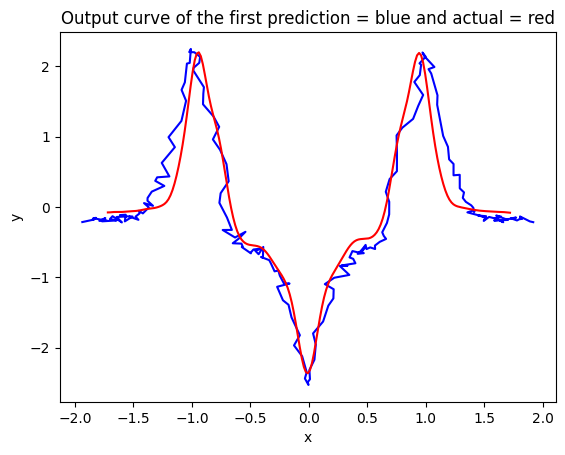

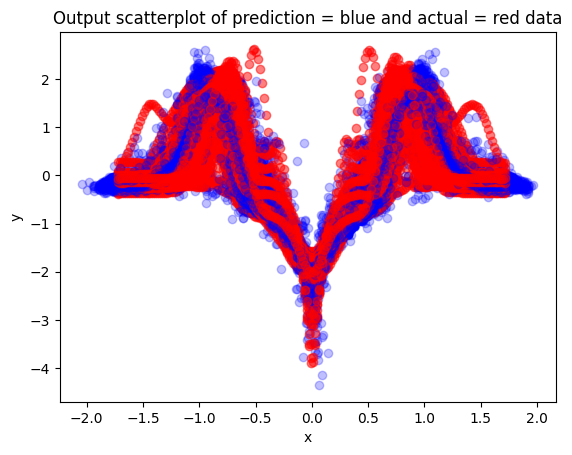

In [166]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
#x = layers.Dense(3000, activation="relu")(x)
#x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=30),
             TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_151 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_152 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_153 (Dense)           (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 3s 257ms/step - loss: 4.9525 - val_loss: 3.5616
Epoch 2/500
7/7 [==============================] - 1s 90ms/step - loss: 3.9116 - 

7/7 [==============================] - 1s 80ms/step - loss: 1.6978 - val_loss: 2.3034
Epoch 75/500
7/7 [==============================] - 1s 81ms/step - loss: 1.7906 - val_loss: 2.4637
Epoch 76/500
7/7 [==============================] - 1s 77ms/step - loss: 1.8351 - val_loss: 2.5152
Epoch 77/500
7/7 [==============================] - 1s 79ms/step - loss: 1.7412 - val_loss: 2.3317
Epoch 78/500
7/7 [==============================] - 1s 78ms/step - loss: 1.6471 - val_loss: 2.2934
Epoch 79/500
7/7 [==============================] - 1s 82ms/step - loss: 1.7031 - val_loss: 2.3214
Epoch 80/500
7/7 [==============================] - 1s 78ms/step - loss: 1.8079 - val_loss: 2.5397
Epoch 81/500
7/7 [==============================] - 1s 192ms/step - loss: 1.7778 - val_loss: 2.3617
Epoch 82/500
7/7 [==============================] - 1s 82ms/step - loss: 1.9455 - val_loss: 2.5313
Epoch 83/500
7/7 [==============================] - 1s 77ms/step - loss: 1.7560 - val_loss: 2.2170
Epoch 84/500
7/7 [====

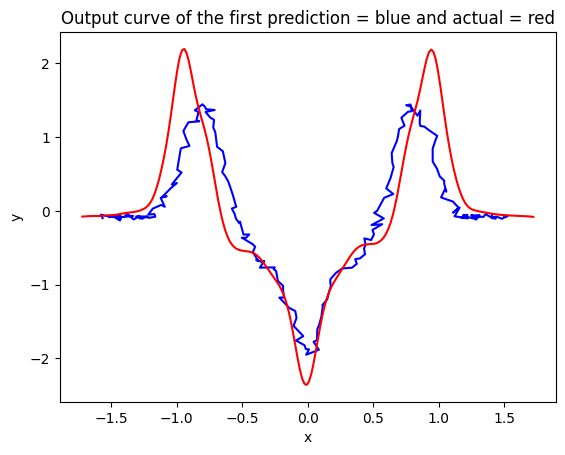

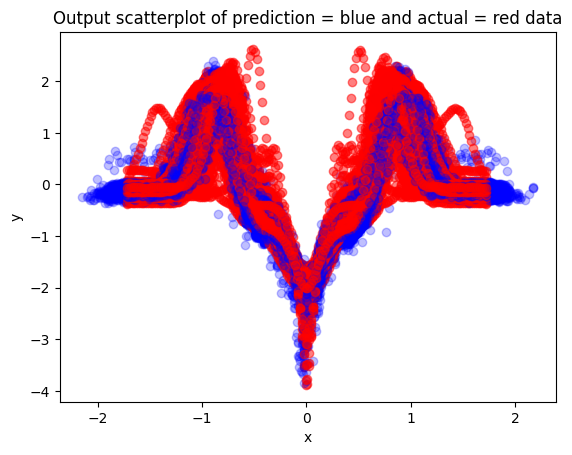

In [167]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
#x = layers.Dense(3000, activation="relu")(x)
#x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [EarlyStopping(monitor='val_loss', patience=50),
             TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_154 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_155 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_156 (Dense)           (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 2s 223ms/step - loss: 4.8791 - val_loss: 3.5466
Epoch 2/500
7/7 [==============================] - 1s 88ms/step - loss: 3.9133 - 

7/7 [==============================] - 1s 78ms/step - loss: 1.8083 - val_loss: 2.4789
Epoch 75/500
7/7 [==============================] - 1s 80ms/step - loss: 1.7382 - val_loss: 2.3806
Epoch 76/500
7/7 [==============================] - 1s 82ms/step - loss: 1.8236 - val_loss: 2.3852
Epoch 77/500
7/7 [==============================] - 1s 81ms/step - loss: 1.8957 - val_loss: 2.7747
Epoch 78/500
7/7 [==============================] - 1s 81ms/step - loss: 1.8667 - val_loss: 2.2882
Epoch 79/500
7/7 [==============================] - 1s 84ms/step - loss: 1.7192 - val_loss: 2.2324
Epoch 80/500
7/7 [==============================] - 1s 77ms/step - loss: 1.5774 - val_loss: 2.2916
Epoch 81/500
7/7 [==============================] - 1s 184ms/step - loss: 1.5796 - val_loss: 2.2669
Epoch 82/500
7/7 [==============================] - 1s 82ms/step - loss: 1.6357 - val_loss: 2.2853
Epoch 83/500
7/7 [==============================] - 1s 83ms/step - loss: 1.6179 - val_loss: 2.2290
Epoch 84/500
7/7 [====

7/7 [==============================] - 1s 85ms/step - loss: 1.5692 - val_loss: 2.2324
Epoch 238/500
7/7 [==============================] - 1s 93ms/step - loss: 1.4956 - val_loss: 2.1318
Epoch 239/500
7/7 [==============================] - 1s 89ms/step - loss: 1.4051 - val_loss: 2.1027
Epoch 240/500
7/7 [==============================] - 1s 109ms/step - loss: 1.4994 - val_loss: 2.1410
Epoch 241/500
7/7 [==============================] - 2s 282ms/step - loss: 1.4666 - val_loss: 2.2527
Epoch 242/500
7/7 [==============================] - 1s 102ms/step - loss: 1.5010 - val_loss: 2.2937
Epoch 243/500
7/7 [==============================] - 1s 101ms/step - loss: 1.5501 - val_loss: 2.4283
Epoch 244/500
7/7 [==============================] - 1s 92ms/step - loss: 1.5251 - val_loss: 2.3716
Epoch 245/500
7/7 [==============================] - 1s 104ms/step - loss: 1.6226 - val_loss: 2.3177
Epoch 246/500
7/7 [==============================] - 1s 83ms/step - loss: 1.4208 - val_loss: 2.1697
Epoch 247

Epoch 400/500
7/7 [==============================] - 1s 80ms/step - loss: 1.3332 - val_loss: 2.1056
Epoch 401/500
7/7 [==============================] - 1s 189ms/step - loss: 1.4511 - val_loss: 2.1422
Epoch 402/500
7/7 [==============================] - 1s 81ms/step - loss: 1.4977 - val_loss: 2.2700
Epoch 403/500
7/7 [==============================] - 1s 76ms/step - loss: 1.4767 - val_loss: 2.2015
Epoch 404/500
7/7 [==============================] - 1s 80ms/step - loss: 1.4133 - val_loss: 2.1074
Epoch 405/500
7/7 [==============================] - 1s 80ms/step - loss: 1.4459 - val_loss: 2.0941
Epoch 406/500
7/7 [==============================] - 1s 77ms/step - loss: 1.4119 - val_loss: 2.0982
Epoch 407/500
7/7 [==============================] - 1s 79ms/step - loss: 1.5172 - val_loss: 2.2289
Epoch 408/500
7/7 [==============================] - 1s 170ms/step - loss: 1.4902 - val_loss: 2.1775
Epoch 409/500
7/7 [==============================] - 1s 175ms/step - loss: 1.3974 - val_loss: 2.18

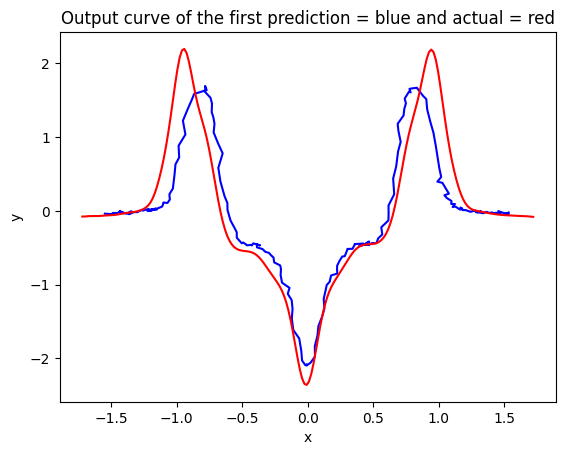

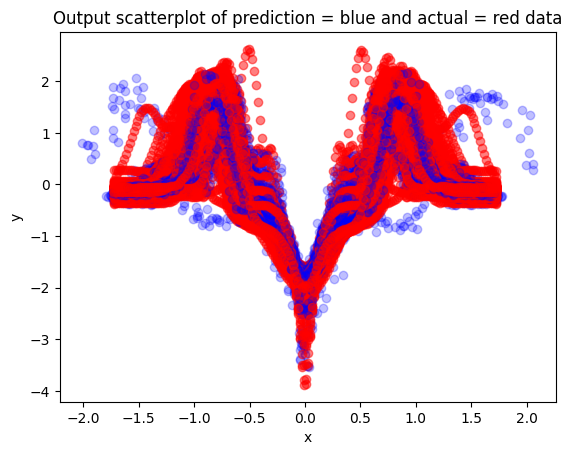

In [168]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu")(inputs)
#x = layers.Dense(3000, activation="relu")(x)
#x = layers.Dense(2000, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_157 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_158 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_159 (Dense)           (None, 400)               400400    
                                                                 
Total params: 4,403,400
Trainable params: 4,403,400
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
7/7 [==============================] - 3s 254ms/step - loss: 816.9285 - val_loss: 668.2618
Epoch 2/500
7/7 [==============================] - 1s 106ms/step - loss: 595.

Epoch 73/500
7/7 [==============================] - 1s 198ms/step - loss: 8.5703 - val_loss: 8.7491
Epoch 74/500
7/7 [==============================] - 1s 116ms/step - loss: 8.1140 - val_loss: 8.5737
Epoch 75/500
7/7 [==============================] - 1s 95ms/step - loss: 7.8936 - val_loss: 8.4032
Epoch 76/500
7/7 [==============================] - 1s 124ms/step - loss: 8.2354 - val_loss: 8.2986
Epoch 77/500
7/7 [==============================] - 1s 139ms/step - loss: 7.9872 - val_loss: 8.2465
Epoch 78/500
7/7 [==============================] - 1s 124ms/step - loss: 7.8628 - val_loss: 8.2770
Epoch 79/500
7/7 [==============================] - 1s 121ms/step - loss: 7.6610 - val_loss: 8.0973
Epoch 80/500
7/7 [==============================] - 1s 120ms/step - loss: 7.4987 - val_loss: 7.9321
Epoch 81/500
7/7 [==============================] - 1s 208ms/step - loss: 7.4179 - val_loss: 8.1586
Epoch 82/500
7/7 [==============================] - 1s 97ms/step - loss: 7.7178 - val_loss: 8.0555
Ep

Epoch 236/500
7/7 [==============================] - 5s 808ms/step - loss: 6.4760 - val_loss: 6.9515
Epoch 237/500
7/7 [==============================] - 1s 186ms/step - loss: 6.5929 - val_loss: 6.9835
Epoch 238/500
7/7 [==============================] - 1s 98ms/step - loss: 6.4974 - val_loss: 6.9910
Epoch 239/500
7/7 [==============================] - 1s 94ms/step - loss: 6.3900 - val_loss: 6.9394
Epoch 240/500
7/7 [==============================] - 1s 98ms/step - loss: 6.5017 - val_loss: 6.9608
Epoch 241/500
7/7 [==============================] - 2s 236ms/step - loss: 6.4901 - val_loss: 6.9300
Epoch 242/500
7/7 [==============================] - 1s 94ms/step - loss: 6.4530 - val_loss: 7.0553
Epoch 243/500
7/7 [==============================] - 1s 101ms/step - loss: 6.5321 - val_loss: 7.1352
Epoch 244/500
7/7 [==============================] - 1s 98ms/step - loss: 6.5043 - val_loss: 6.9957
Epoch 245/500
7/7 [==============================] - 1s 98ms/step - loss: 6.4462 - val_loss: 6.9

Epoch 399/500
7/7 [==============================] - 1s 99ms/step - loss: 6.4803 - val_loss: 7.2813
Epoch 400/500
7/7 [==============================] - 1s 92ms/step - loss: 6.5450 - val_loss: 7.1820
Epoch 401/500
7/7 [==============================] - 1s 204ms/step - loss: 6.5600 - val_loss: 7.1902
Epoch 402/500
7/7 [==============================] - 1s 97ms/step - loss: 6.6415 - val_loss: 7.1330
Epoch 403/500
7/7 [==============================] - 1s 96ms/step - loss: 6.5310 - val_loss: 7.1453
Epoch 404/500
7/7 [==============================] - 1s 94ms/step - loss: 6.6270 - val_loss: 7.0821
Epoch 405/500
7/7 [==============================] - 1s 137ms/step - loss: 6.4585 - val_loss: 7.3650
Epoch 406/500
7/7 [==============================] - 1s 95ms/step - loss: 6.6219 - val_loss: 7.2706
Epoch 407/500
7/7 [==============================] - 1s 94ms/step - loss: 6.8809 - val_loss: 7.3557
Epoch 408/500
7/7 [==============================] - 1s 99ms/step - loss: 6.8045 - val_loss: 7.443

Epoch 481/500
7/7 [==============================] - 1s 202ms/step - loss: 6.6284 - val_loss: 7.2598
Epoch 482/500
7/7 [==============================] - 1s 97ms/step - loss: 6.7182 - val_loss: 7.1959
Epoch 483/500
7/7 [==============================] - 1s 203ms/step - loss: 6.5244 - val_loss: 7.1224
Epoch 484/500
7/7 [==============================] - 2s 352ms/step - loss: 6.5242 - val_loss: 7.1120
Epoch 485/500
7/7 [==============================] - 3s 476ms/step - loss: 6.5163 - val_loss: 7.0913
Epoch 486/500
7/7 [==============================] - 3s 483ms/step - loss: 6.6376 - val_loss: 7.1808
Epoch 487/500
7/7 [==============================] - 1s 213ms/step - loss: 6.5101 - val_loss: 7.1902
Epoch 488/500
7/7 [==============================] - 1s 198ms/step - loss: 6.5978 - val_loss: 7.4458
Epoch 489/500
7/7 [==============================] - 1s 127ms/step - loss: 6.8177 - val_loss: 7.2955
Epoch 490/500
7/7 [==============================] - 1s 96ms/step - loss: 6.7254 - val_loss:

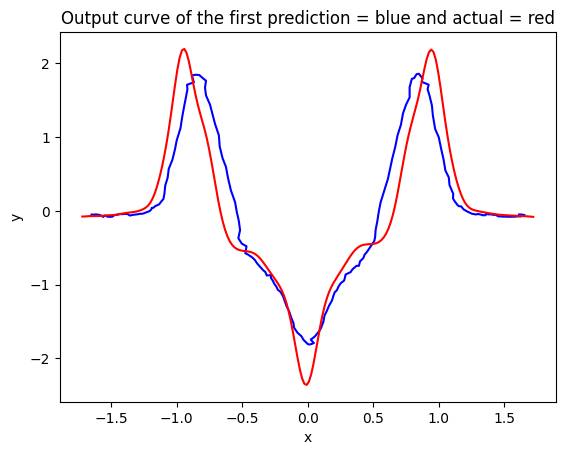

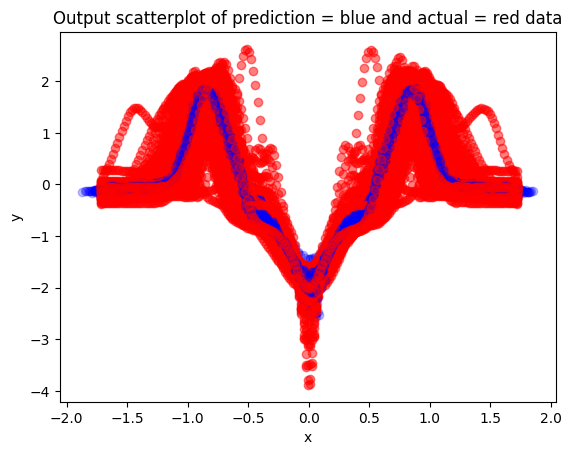

In [169]:
from keras.regularizers import l1, l2

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(inputs)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(x)
x = layers.Dense(500, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=500, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_160 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_161 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_162 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_163 (Dense)           (None, 500)               500500    
                                                                 
 dense_164 (Dense)           (None, 400)               200400    
                                                                 
Total params: 5,704,900
Trainable params: 5,704,900
Non-tr

Epoch 149/250
7/7 [==============================] - 1s 122ms/step - loss: 12.2622 - val_loss: 12.9192
Epoch 150/250
7/7 [==============================] - 1s 123ms/step - loss: 12.2457 - val_loss: 12.9856
Epoch 151/250
7/7 [==============================] - 2s 259ms/step - loss: 12.2630 - val_loss: 12.9032
Epoch 152/250
7/7 [==============================] - 1s 122ms/step - loss: 12.2238 - val_loss: 12.9352
Epoch 153/250
7/7 [==============================] - 1s 118ms/step - loss: 12.1943 - val_loss: 12.9417
Epoch 154/250
7/7 [==============================] - 1s 122ms/step - loss: 12.1917 - val_loss: 12.8624
Epoch 155/250
7/7 [==============================] - 1s 127ms/step - loss: 12.1512 - val_loss: 12.8841
Epoch 156/250
7/7 [==============================] - 1s 120ms/step - loss: 12.2046 - val_loss: 12.9335
Epoch 157/250
7/7 [==============================] - 1s 119ms/step - loss: 12.2123 - val_loss: 12.9060
Epoch 158/250
7/7 [==============================] - 1s 120ms/step - loss

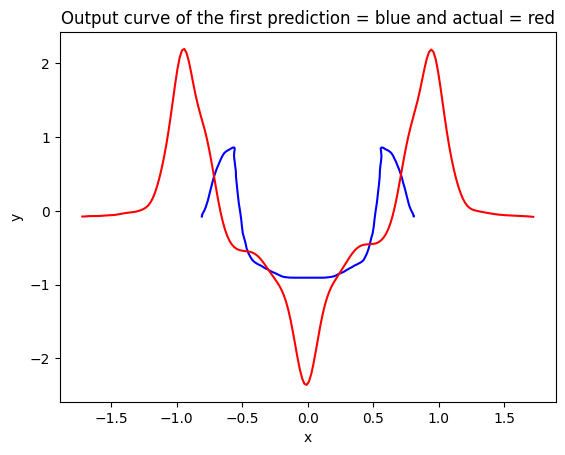

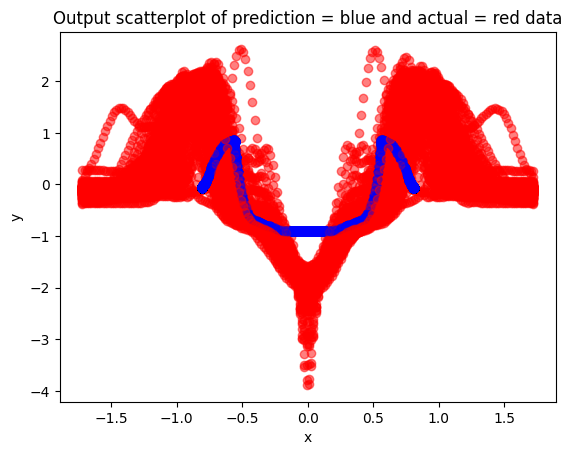

In [171]:
from keras.regularizers import l1, l2

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(inputs)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(x)
x = layers.Dense(500, activation="relu", kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(x)
outputs = layers.Dense(400, kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01))(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=250, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_44 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_165 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_166 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_167 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_168 (Dense)           (None, 500)               500500    
                                                                 
 dense_169 (Dense)           (None, 400)               200400    
                                                                 
Total params: 5,704,900
Trainable params: 5,704,900
Non-tr

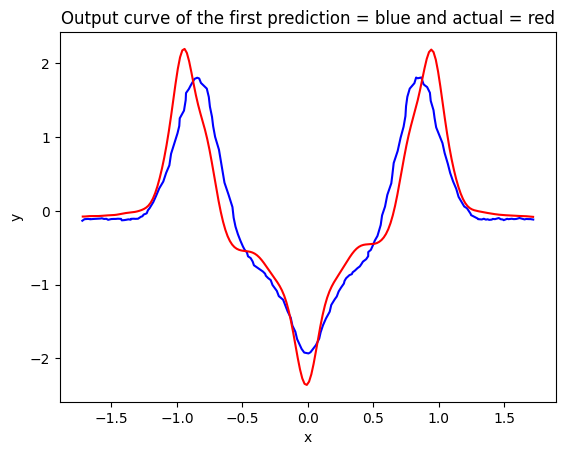

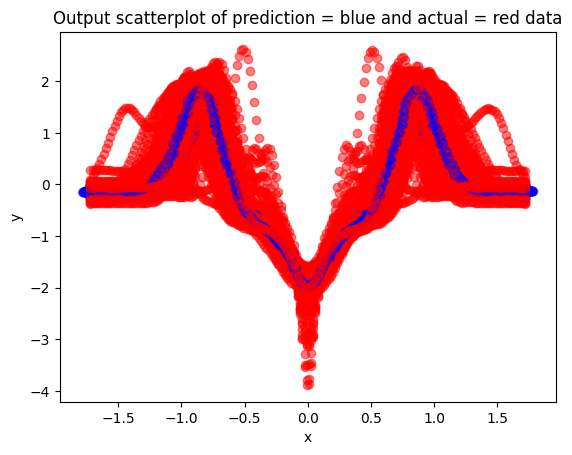

In [173]:
from keras.regularizers import l1, l2

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1(0.01))(inputs)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.01))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1(0.01))(x)
x = layers.Dense(500, activation="relu", kernel_regularizer=l1(0.01))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_45 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_170 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_171 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_172 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_173 (Dense)           (None, 500)               500500    
                                                                 
 dense_174 (Dense)           (None, 400)               200400    
                                                                 
Total params: 5,704,900
Trainable params: 5,704,900
Non-tr

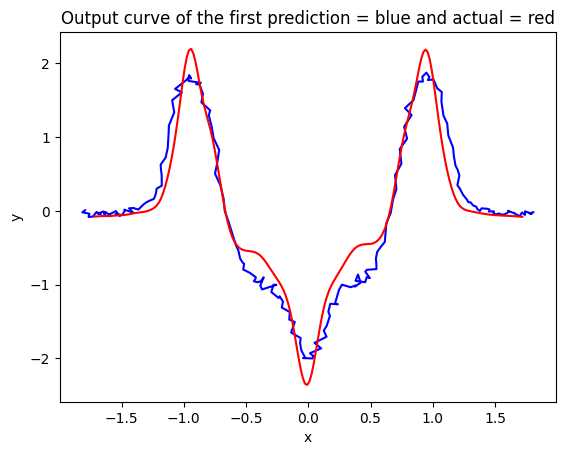

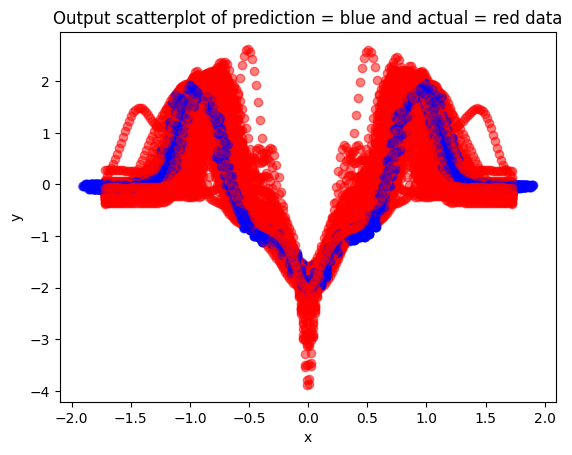

In [174]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", kernel_regularizer=l2(0.01))(inputs)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l2(0.01))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l2(0.01))(x)
x = layers.Dense(500, activation="relu", kernel_regularizer=l2(0.01))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_175 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_176 (Dense)           (None, 1000)              2001000   
                                                                 
 dense_177 (Dense)           (None, 1000)              1001000   
                                                                 
 dense_178 (Dense)           (None, 500)               500500    
                                                                 
 dense_179 (Dense)           (None, 400)               200400    
                                                                 
Total params: 5,704,900
Trainable params: 5,704,900
Non-tr

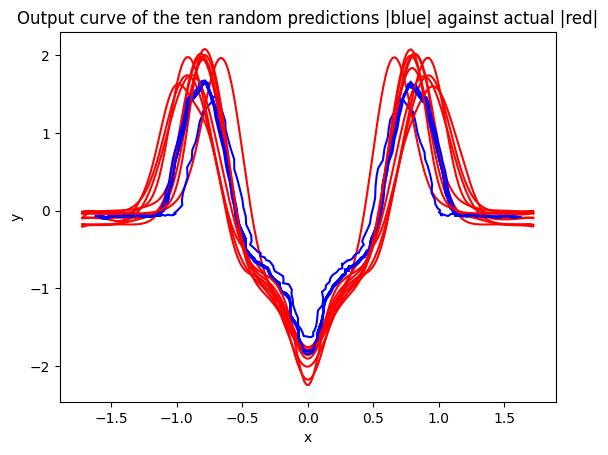

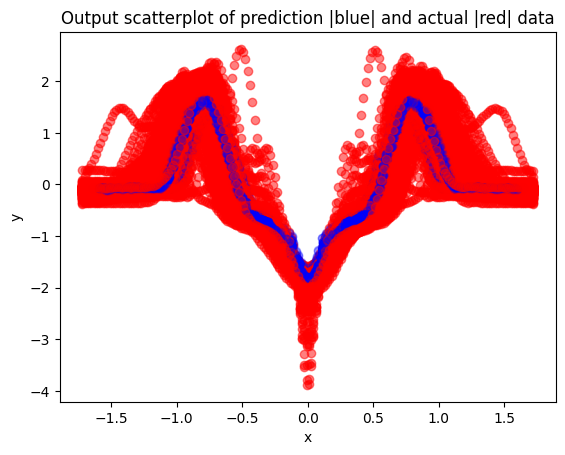

In [189]:
from keras.regularizers import l1_l2

inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(inputs)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
x = layers.Dense(1000, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
x = layers.Dense(500, activation="relu", kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=100, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

Model: "model_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 1000)]            0         
                                                                 
 dense_180 (Dense)           (None, 2000)              2002000   
                                                                 
 dense_181 (Dense)           (None, 2000)              4002000   
                                                                 
 dense_182 (Dense)           (None, 2000)              4002000   
                                                                 
 dense_183 (Dense)           (None, 2000)              4002000   
                                                                 
 dense_184 (Dense)           (None, 400)               800400    
                                                                 
Total params: 14,808,400
Trainable params: 14,808,400
Non-

7/7 [==============================] - 2s 348ms/step - loss: 9.8823 - val_loss: 10.5014
Epoch 150/250
7/7 [==============================] - 2s 335ms/step - loss: 9.9215 - val_loss: 10.4954
Epoch 151/250
7/7 [==============================] - 5s 710ms/step - loss: 10.0076 - val_loss: 10.4296
Epoch 152/250
7/7 [==============================] - 2s 337ms/step - loss: 9.8839 - val_loss: 10.4072
Epoch 153/250
7/7 [==============================] - 2s 353ms/step - loss: 9.8745 - val_loss: 10.4608
Epoch 154/250
7/7 [==============================] - 2s 342ms/step - loss: 9.9326 - val_loss: 10.5208
Epoch 155/250
7/7 [==============================] - 2s 344ms/step - loss: 9.8500 - val_loss: 10.5297
Epoch 156/250
7/7 [==============================] - 2s 339ms/step - loss: 9.9143 - val_loss: 10.5274
Epoch 157/250
7/7 [==============================] - 3s 396ms/step - loss: 9.9164 - val_loss: 10.5466
Epoch 158/250
7/7 [==============================] - 3s 402ms/step - loss: 9.8312 - val_loss: 1

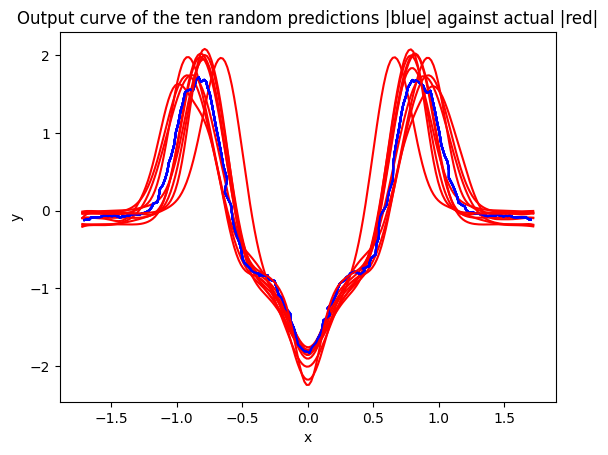

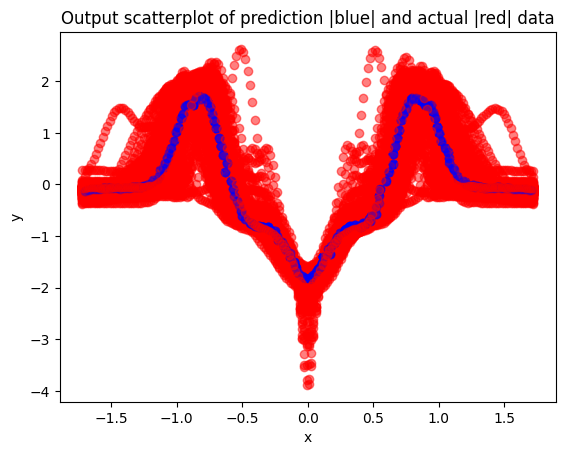

In [192]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(inputs)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(x)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(x)
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(x)
outputs = layers.Dense(400)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=250, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))

In [ ]:
inputs = keras.Input(shape=(1000,))
x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(inputs)
#x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(x)
#x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(x)
#x = layers.Dense(2000, activation="relu", kernel_regularizer=l1_l2(l1=0.005, l2=0.005))(x)
x = layers.Dense(400)(x)
outputs = layers.Reshape((200,2))
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss=custom_loss)
model.summary()

callbacks = [TensorBoard(log_dir='model_2_data',
                         histogram_freq=10,
                         write_graph=False,
                         write_images=False,
                         update_freq='epoch',
                         embeddings_freq=0)]

model.fit(train_input_values, train_output_values, batch_size=64, epochs=250, validation_split=0.2,callbacks=callbacks)
print('')
print('Loss is:' + str(Loss(test_output_values, model.predict(test_input_values))))
print('')
Plots(test_output_values,model.predict(test_input_values))